<a href="https://colab.research.google.com/github/WittmannF/deep-learning-keras/blob/master/modulo-2/atividade-1-boston-housing-resolvido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa 1: Prevendo Preços das Casas de Boston
Em sua primeira missão, você vai treinar um modelo com um conjunto de dados real. O [Boston Housing Dataset](http://lib.stat.cmu.edu/datasets/boston) contém informações recolhidas em 1978 pelo U.S Census Serviço com relação a habitação na área de Boston Mass. Seu objetivo é criar um modelo de previsão do preço de uma casa com base em 13 atributos (características). Essas características são:
- CRIM: Esta é a taxa de criminalidade per capita por cidade
- ZN: Esta é a proporção de terrenos residenciais zoneada para lotes maiores do que 25.000 sq.ft.
- INDUS: Proporção de não retalhistas acres de negócios por cidade
- CHAS: Charles River variável binária (isto é igual a 1 se limita tracto rio; 0 de outro modo)
- NOX: nítrico concentração de óxidos de (partes por 10 milhões)
- RM: Número médio de quartos por habitação
- AGE: Proporção de unidades ocupadas pelos proprietários construído antes de 1940
- DIS: distâncias ponderados para ve centros de emprego Boston
- RAD: Índice de acessibilidade às rodovias radiais
- TAX: taxa de propriedade de impostos Full-valor por 10000 USD
- PTRATIO: relação professor-aluno por cidade
- B: Calculado como 1000 (Bk - 0.63) ^ 2, onde Bk é a proporção de pessoas de ascendência Africano americano por cidade
- LSTAT: Percentagem da população status inferior

Como variável alvo, vamos usar última coluna:
- MEDV: valor médio das casas ocupadas pelos proprietários

Opcionalmente, você também pode comparar seus resultados com o [Boston Housing Data Science Contest by Kaggle](https://www.kaggle.com/c/boston-housing). Embora o concurso já terminou, você ainda pode fazer uma apresentação tardia e comparar sua pontuação com o leaderboard.

## Começando
Você terá que percorrer os 5 passos que temos visto no vídeo 4:
1. Explorando os dados
   - Importação de dados
   - Compreender os dados
2. Preparar os dados
   - Scaling
   - Transformando
   - One-Hot Encoding
   - Train teste de divisão /
3. Desenvolver um modelo base
4. Verificação de Previsões
5. Melhoria de Resultados
6. (Opcional) Compare seus resultados no Kaggle
Os 4 primeiros passos são parcialmente implementado. Você terá que acabar com eles e também implementar a etapa 5.
## 1. Explorando os dados
### Importando o conjunto de dados
O conjunto de dados Boston Housing está disponível em [keras.io/datasets](https://keras.io/datasets/). Executar a próxima célula, a fim de fazer o download e importar o conjunto de dados:

In [2]:
import warnings
warnings.filterwarnings("ignore")

from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 1us/step


Vamos explorar e compreender este conjunto de dados.
### Compreender o conjunto de dados (Análise Exploratória de Dados)
O conjunto de dados já foi splited em ( `X_train` e` y_train`) e teste ( `X_test` e` y_test`) subconjuntos de treinamento. Como uma revisão, o conjunto de treinamento é usado para definir a fronteira de decisão da rede neural (ou seja, treinamento do modelo), enquanto o conjunto de teste é um conjunto independente usados ​​para avaliar o quão bom ele é o modelo com dados invisíveis. Vamos obter algumas informações a partir desses conjuntos de dados. Vamos converter o conjunto de treinamento em um [Pandas Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) a fim de obter mais estatísticas:

In [3]:
import pandas as pd
import numpy as np

# TODO: Number of elements in the training set
training_len = len(y_train)

# TODO: Number of elements in the test set
test_len = len(y_test)

# Show the calculated values
print("There are {} houses in the training set".format(training_len))
print("There are {} houses in the test set".format(test_len))

# Convert the training set into a Pandas Dataframe in order to get more statistics:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
df = pd.DataFrame(np.c_[X_train, y_train], columns = columns)
df.head()

There are 404 houses in the training set
There are 102 houses in the test set


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


A última coluna foi renomeado de ** MEDV ** Para Preço ** **, a fim de fornecer mais semântica sobre o que queremos de prever. Agora, vamos obter algumas estatísticas sobre cada recurso:

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817,22.395050
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545,9.210442
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000,16.675000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000,20.750000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500,24.800000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


E, finalmente, vamos visualizar algumas dessas colunas com uma matriz de dispersão usando [seaborn](https://seaborn.pydata.org/):

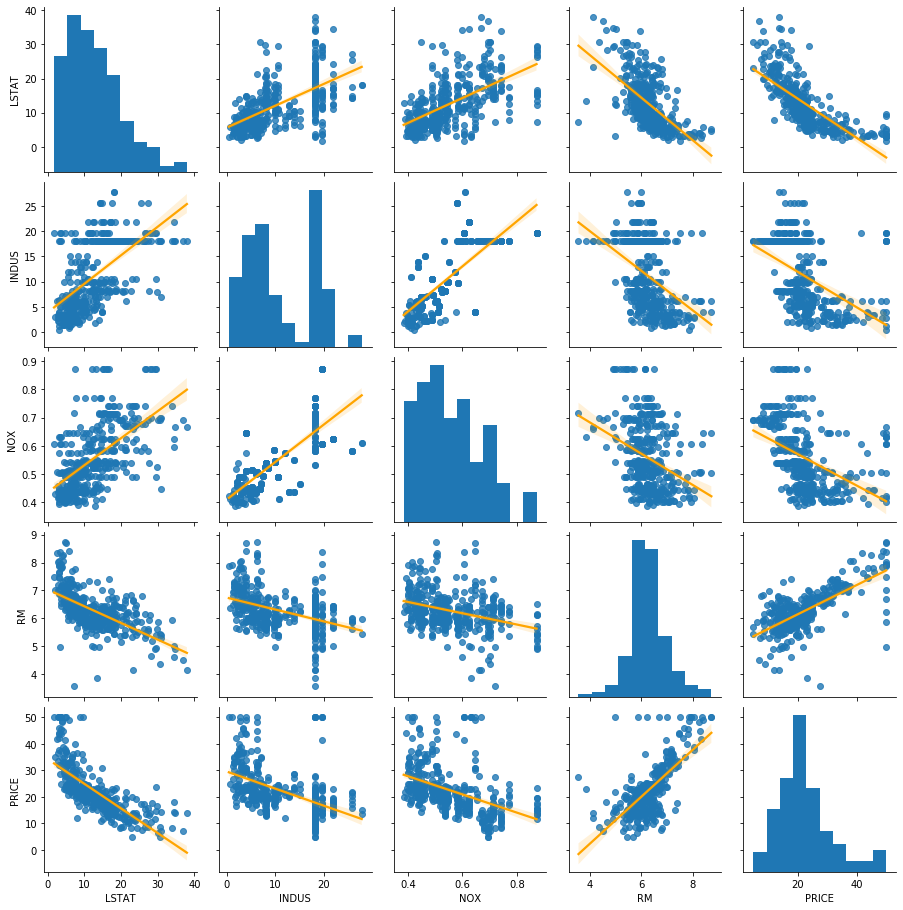

In [5]:
import seaborn as sns # pip install seaborn
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'PRICE'] 
sns.pairplot(df[cols], kind='reg', plot_kws={'line_kws':{'color':'orange'}})
# NOTE: If there's no output, run again!

No gráfico anterior, podemos verificar as tendências de alguns recursos quando comparado com os outros. Especialmente a última linha é importante, pois permite-nos verificar as tendências de algumas características com o preço no eixo y. Também é possível verificar algumas parcelas do histograma.
> ** NOTA: ** Se a linha anterior não funcionar, é provável porque Seaborn não está instalado. Se você estiver usando o chapéu seu caso, apenas `pip instalar seaborn` em seu terminal. Se você estiver usando o Google Colab, o Seaborn já está instalado por padrão.
## 2. Preparar os dados
Uma vez que o conjunto de dados já está dividida em treinamento e subconjuntos de testes, só está faltando para dimensionar o conjunto de dados.
### 2.1 Atribuição - Escala os dados de treinamento
Dimensionar o conjunto de dados usando scaller padrão, da mesma forma como foi apresentado no vídeo 4:

In [6]:
print("*** Before Scaling ***")
print("Mean of each feature in the training set\n{}".format(np.round(np.mean(X_train, axis=0))))
print("Standard deviation of each feature in the training set\n{}".format(np.round(np.std(X_train, axis=0))))

# Function to standardize the training data
def standardize(X, X_mean, X_std):
    return (X-X_mean)/X_std

# Get mean of each column in the training set
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

# Apply standardization to the features in the training and test sets
X_train = standardize(X_train, X_mean, X_std)
X_test = standardize(X_test, X_mean, X_std)

print("\n*** After Scaling ***")
print("Mean of each feature in the training set\n{}".format(np.round(np.mean(X_train, axis=0))))
print("Standard deviation of each feature in the training set\n{}".format(np.round(np.std(X_train, axis=0))))

*** Before Scaling ***
Mean of each feature in the training set
[  4.  11.  11.   0.   1.   6.  69.   4.   9. 406.  18. 355.  13.]
Standard deviation of each feature in the training set
[  9.  24.   7.   0.   0.   1.  28.   2.   9. 166.   2.  94.   7.]

*** After Scaling ***
Mean of each feature in the training set
[-0.  0.  0. -0. -0.  0.  0.  0.  0. -0.  0.  0.  0.]
Standard deviation of each feature in the training set
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## 3. Desenvolver um modelo básico
Para a função de perda, vamos usar o mesmo que é exigido no concurso Kaggle, o erro Root Mean Squared (RMSE):
$$ RMSE = \sqrt {\sum_i^N {\frac{(y_i - \hat{y_i})^2}{N}}} $$


In [0]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 


Agora vamos executar o primeiro e mais simples versão do nosso modelo, da mesma forma como foi feito em vídeo 4:

In [8]:
# 0. Import keras dependencies here
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

# 1. Define your base model here
model = Sequential([
        Dense(units=1, input_shape=(13,))
    ])

# 2. Set your optimizer and loss function here
opt = SGD()
model.compile(optimizer=opt,
             loss=[root_mean_squared_error])


# 3. Train your model
model.fit(X_train, y_train)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





404/404 [==============================] - 9s 21ms/step - loss: 22.3389


Quando comparado com o Video 4, a forma de entrada foi aumentada para 13 uma vez que existem 13 características.

## 4. Previsões Verificação
Vamos verificar alguns resultados numéricos e visuais:


**** Evaluating the Test set ****
102/102 [==============================] - 0s 231us/step
Test Loss: 22.635


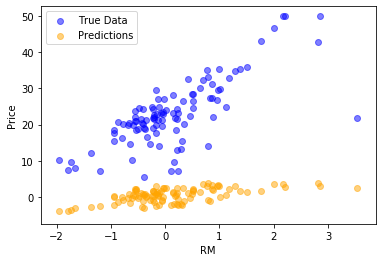

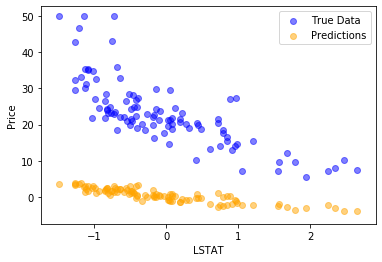

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

def check_predictions(model, X, y, cols):
    print("\n**** Evaluating the Test set ****")
    loss_test = model.evaluate(X, y)
    print("Test Loss: {:.3f}".format(loss_test))
    
    for column in cols:
        y_pred = model.predict(X)
        idx = columns.index(column)
        plt.scatter(X[:, idx], y, c='b', alpha=0.5, label="True Data")
        plt.scatter(X[:, idx], y_pred, c='orange', alpha=0.5, label="Predictions")
        plt.xlabel(column)
        plt.ylabel("Price")
        plt.legend(loc=0)
        plt.show()
    
check_predictions(model, X_test, y_test, ['RM', 'LSTAT'])

Nós podemos verificar tanto numericamente e visualmente que os resultados são muito ruins. Idealmente queremos um R2 Score próximo de 1. O valor de um dos -7 indica que o modelo é muito ruim. Nós um também confirmam isso quando comparando os verdadeiros dados e previsões em duas características. Seu trabalho vai ser para melhorar esses resultados:
## 5. TODO: Melhorar os Resultados

Agora é a sua vez! Tente-se algumas técnicas para melhorar os resultados anteriores. Aqui estão algumas ideias:
- Aumentar o número de camadas ocultas e funções de ativação add:
- Como [regra de ouro](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw), você pode começar a tentar uma camada escondida com o número de neurônios nessa camada como a média dos neurônios nas camadas de entrada, mais saída.
- Este é um exemplo com **duas camadas escondidas** com 13 neuronios na primeira camada escondida e 7 neuronios na segunda camada escondida:
    ```
    model = Sequential([
    Dense(units=13, input_shape=(13,), activation='relu'),
    Dense(units=7, activation='relu'),
    Dense(1)
    ])
    ```

- Aumentar o número de épocas
- Tune a taxa de aprendizagem
- Alterar o otimizador


In [23]:
# 0. TODO: Import keras dependencies here
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

# 1. TODO: Define your base model here
model = Sequential([
        Dense(7, activation='relu', input_shape=(13,)),
        Dense(1)
    ])


# 2. TODO: Set your optimizer and loss function here
opt = Adam(0.1)

model.compile(optimizer=opt,
             loss=[root_mean_squared_error])

# 3. Train your model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Train on 404 samples, validate on 102 samples
Epoch 1/15
404/404 [==============================] - 0s 1ms/step - loss: 15.0137 - val_loss: 7.8350
Epoch 2/15
404/404 [==============================] - 0s 136us/step - loss: 5.8368 - val_loss: 7.3617
Epoch 3/15
404/404 [==============================] - 0s 143us/step - loss: 5.3103 - val_loss: 4.9228
Epoch 4/15
404/404 [==============================] - 0s 172us/step - loss: 4.1990 - val_loss: 3.8301
Epoch 5/15
404/404 [==============================] - 0s 153us/step - loss: 3.5711 - val_loss: 4.0455
Epoch 6/15
404/404 [==============================] - 0s 146us/step - loss: 3.3947 - val_loss: 3.7354
Epoch 7/15
404/404 [==============================] - 0s 147us/step - loss: 2.9465 - val_loss: 3.3233
Epoch 8/15
404/404 [==============================] - 0s 139us/step - loss: 2.8370 - val_loss: 3.0773
Epoch 9/15
404/404 [==============================] - 0s 140us/step - loss: 3.0084 - val_loss: 3.5329
Epoch 10/15
404/404 [================

In [24]:
opt = Adam(0.001)

model.compile(optimizer=opt,
             loss=[root_mean_squared_error])

# 3. Train your model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Train on 404 samples, validate on 102 samples
Epoch 1/15
404/404 [==============================] - 0s 1ms/step - loss: 2.1162 - val_loss: 2.9397
Epoch 2/15
404/404 [==============================] - 0s 132us/step - loss: 2.0670 - val_loss: 2.8930
Epoch 3/15
404/404 [==============================] - 0s 142us/step - loss: 2.0439 - val_loss: 2.8759
Epoch 4/15
404/404 [==============================] - 0s 136us/step - loss: 2.0349 - val_loss: 2.8721
Epoch 5/15
404/404 [==============================] - 0s 155us/step - loss: 2.0305 - val_loss: 2.8704
Epoch 6/15
404/404 [==============================] - 0s 146us/step - loss: 2.0260 - val_loss: 2.8742
Epoch 7/15
404/404 [==============================] - 0s 171us/step - loss: 2.0214 - val_loss: 2.8736
Epoch 8/15
404/404 [==============================] - 0s 166us/step - loss: 2.0182 - val_loss: 2.8690
Epoch 9/15
404/404 [==============================] - 0s 145us/step - loss: 2.0152 - val_loss: 2.8735
Epoch 10/15
404/404 [=================

Agora vamos ver a previsão do conjunto de teste:


**** Evaluating the Test set ****
102/102 [==============================] - 0s 109us/step
Test Loss: 2.870


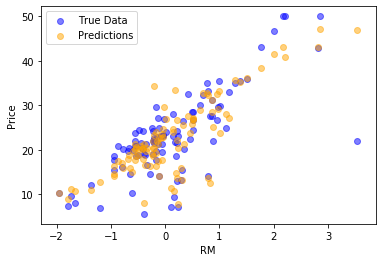

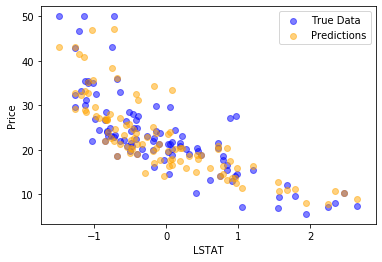

In [25]:
check_predictions(model, X_test, y_test, ['RM', 'LSTAT'])

## 6. (Opcional) Enviar para Kaggle
Embora o concurso já está concluído, você pode tentar enviar como uma apresentação tardia em Kaggle e comparar sua pontuação com outros concorrentes no [leaderboard](https://www.kaggle.com/c/boston-housing/leaderboard). Você apenas tem de clicar no botão "Late Submission" no [contest page](https://www.kaggle.com/c/boston-housing) e, em seguida, fazer upload de um arquivo CSV no formato de apresentação do concurso (ID e previsões).
A fim de tentar-se, certifique-se primeiro o download do arquivo test.csv em [kaggle.com/c/boston-housing/data](https://www.kaggle.com/c/boston-housing/data) e adicioná-lo na pasta do seu projeto. Se você estiver usando Colab, você pode ter que montar Google Drive pela primeira vez.

In [26]:
!wget https://raw.githubusercontent.com/WittmannF/course/master/day-1/kaggle_boston_housing_test.csv

--2020-03-09 14:23:35--  https://raw.githubusercontent.com/WittmannF/course/master/day-1/kaggle_boston_housing_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11755 (11K) [text/plain]
Saving to: ‘kaggle_boston_housing_test.csv’

kaggle_boston_housi 100%[===================>]  11.48K  --.-KB/s    in 0s      

2020-03-09 14:23:36 (125 MB/s) - ‘kaggle_boston_housing_test.csv’ saved [11755/11755]



In [28]:
TEST_PATH = 'kaggle_boston_housing_test.csv'

# Load the test.csv file
testdf = pd.read_csv(TEST_PATH)
testdf.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


Em seguida, execute o seguinte célula, a fim de criar um arquivo de submissão CSV com base em seu modelo:

In [0]:
# Get the column with the IDs
ids = testdf['ID'].values

# Apply Standard transform in the test set
X_test_kaggle = testdf.drop('ID', axis=1)

In [31]:
ids

array([  3,   6,   8,   9,  10,  18,  20,  25,  26,  27,  29,  30,  33,
        34,  36,  37,  38,  42,  49,  53,  60,  63,  70,  72,  79,  80,
        83,  92,  93,  96,  98,  99, 100, 105, 106, 111, 113, 114, 116,
       126, 130, 131, 133, 136, 141, 144, 145, 147, 152, 153, 156, 158,
       163, 169, 185, 186, 189, 196, 197, 199, 200, 203, 208, 210, 211,
       213, 216, 218, 219, 220, 221, 229, 232, 238, 239, 240, 242, 246,
       248, 253, 255, 256, 257, 258, 259, 260, 268, 270, 271, 276, 277,
       278, 279, 281, 288, 290, 292, 295, 296, 299, 300, 301, 308, 314,
       315, 320, 322, 323, 324, 327, 330, 332, 333, 336, 338, 346, 347,
       351, 352, 354, 355, 356, 362, 364, 365, 370, 376, 379, 380, 381,
       382, 386, 389, 391, 394, 396, 398, 400, 403, 405, 406, 407, 410,
       411, 412, 413, 417, 421, 422, 423, 424, 427, 431, 436, 437, 439,
       447, 450, 451, 455, 457, 471, 474, 476, 483, 486, 490, 495, 496,
       497, 499, 501, 505])

In [0]:
X_test_kaggle_std = standardize(X_test_kaggle.values, X_mean, X_std)

In [0]:
# Get predictions
y_pred_kaggle = model.predict(X_test_kaggle_std)

In [0]:
# Convert to a dataframe in the submission format
submit = pd.DataFrame(np.c_[ids, y_pred_kaggle], columns=['ID', 'medv'])
submit['ID'] = submit['ID'].astype(int)


In [0]:
# Convert to a CSV file
submit.to_csv('my_submission_live.csv', index=False)

In [47]:
!head my_submission_live.csv

ID,medv
3,31.71134376525879
6,24.23938751220703
8,17.409286499023438
9,16.53107452392578
10,16.312679290771484
18,16.812469482421875
20,17.555557250976562
25,16.47843360900879
26,13.93255615234375


Abaixo está a minha melhor pontuação. Você pode comparar seu melhor pontuação usando o [leaderboard](https://www.kaggle.com/c/boston-housing/leaderboard):
![screen shot 2019-02-15 at 18 14 04](https://user-images.githubusercontent.com/5733246/52882019-824f7900-314d-11e9-97d7-17e48e4a1770.png)
